# Creating Panoramas using OpenCV

In [7]:
import os
import cv2
import math
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Steps for Creating Panoramas

- Find keypoints in all images
- Find pairwise correspondences
- Estimate pairwise Homographies
- Refine Homographies
- Stitch with Blending

In [9]:
# Read Images
imagefiles = glob(f"./nb9/boat{os.sep}*")
imagefiles.sort()

images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
    print(filename)

num_images = len(images)

./nb9/boat\boat1.jpg
./nb9/boat\boat2.jpg
./nb9/boat\boat3.jpg
./nb9/boat\boat4.jpg
./nb9/boat\boat5.jpg
./nb9/boat\boat6.jpg


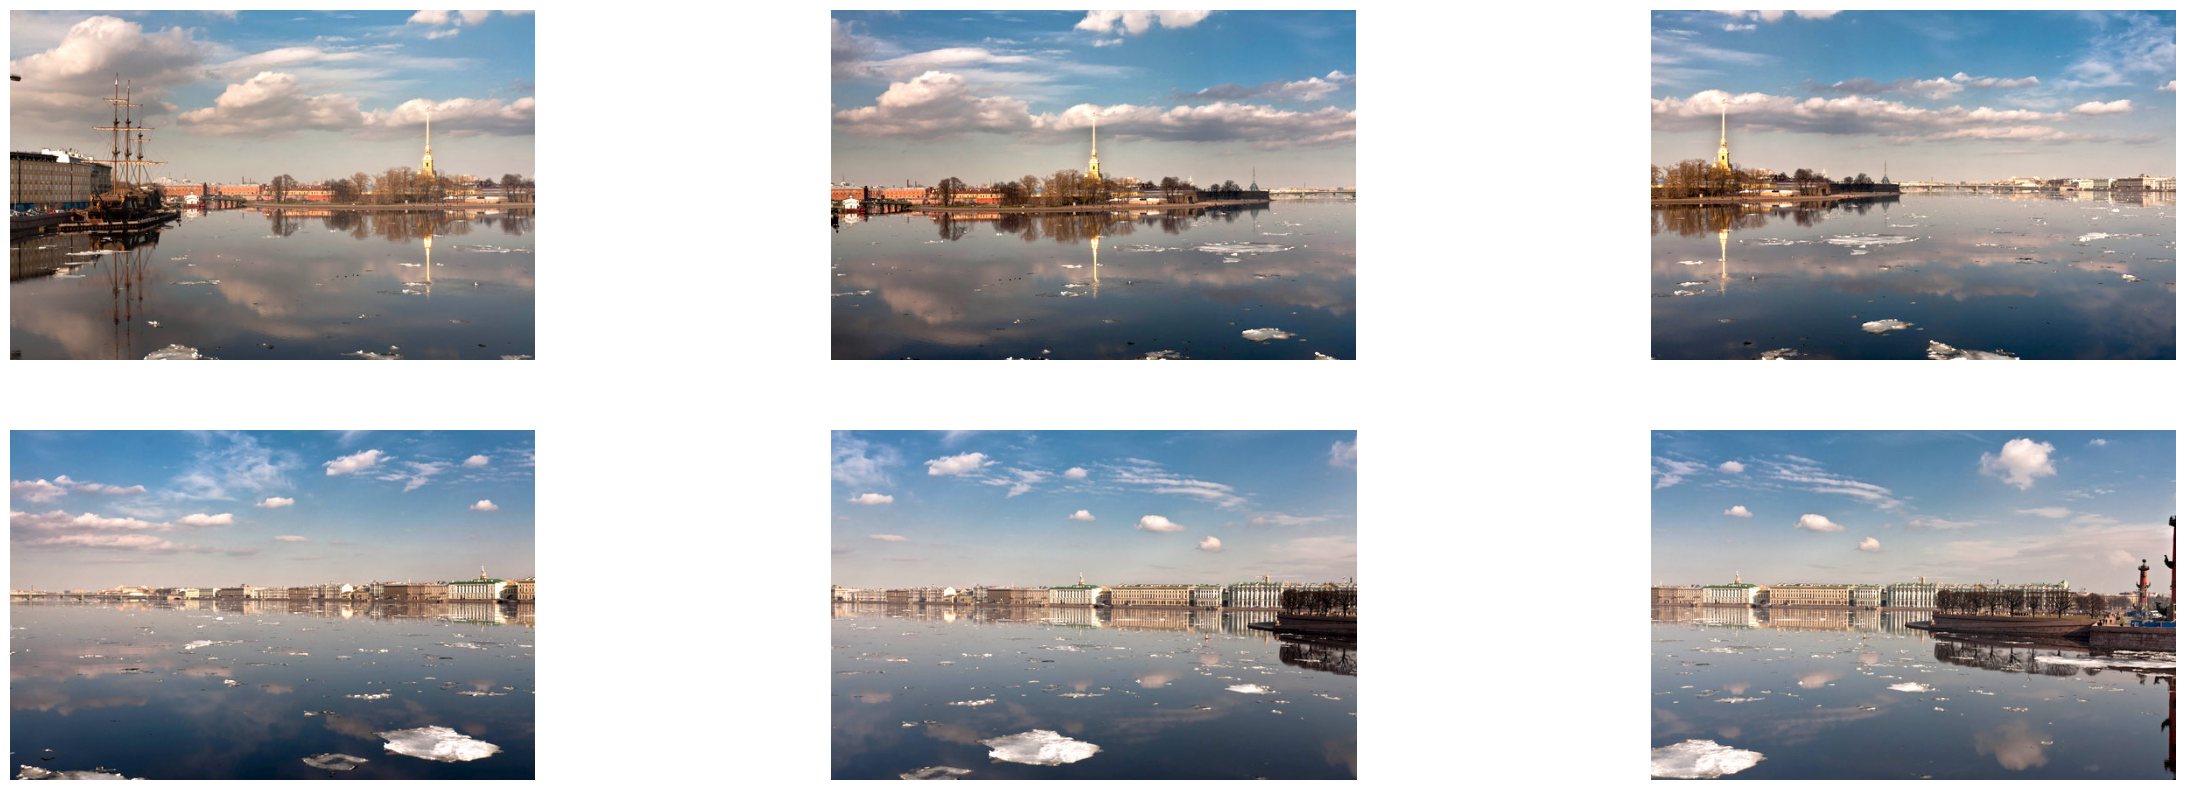

In [10]:
# Display Images

plt.figure(figsize=[30, 10])
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.axis('off')
    plt.imshow(images[i])

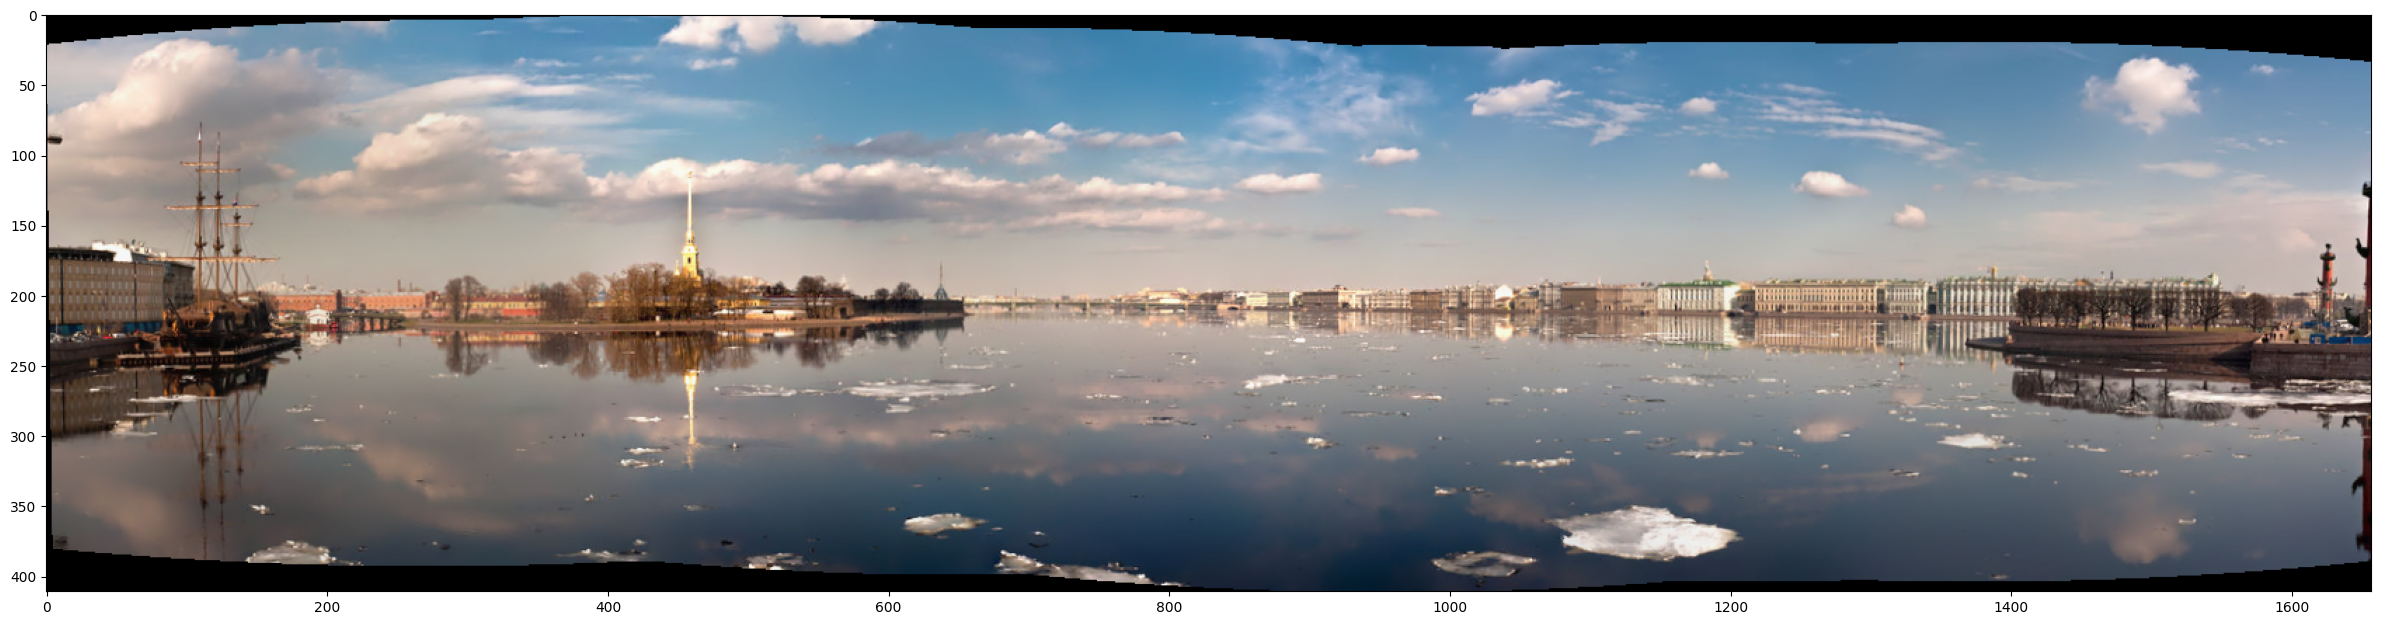

In [11]:
# stitch images

stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)

if status == 0:
    plt.figure(figsize=[30, 10])
    plt.imshow(result)